<a href="https://colab.research.google.com/github/ShemMwanza/ML-Lab-1/blob/main/ML_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
from scipy.stats import binom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [30]:
size = 100

Generate fake data

In [31]:
fake_dataset={'Office Size':np.random.normal(100,0.5,size),'Office Price':np.random.uniform(100,1000,size)}

In [32]:
pd.DataFrame(fake_dataset)

,Office Size,Office Price
0,99.487939,263.690495
1,100.323974,726.608800
2,100.568949,621.782939
3,99.672842,782.893265
4,99.919621,899.565075
...,...,...
95,100.375523,907.521644
96,100.628278,412.688583
97,100.385945,900.290822
98,99.891855,702.048666


In [33]:
X = fake_dataset['Office Size']

In [34]:
Y = fake_dataset['Office Price']

In [35]:
learning_rate = 0.0000003

Linear Regression

In [36]:
class LinearRegression:
  def __init__(self, size, learningRate):
    self.n_w = 0
    self.n_b = 0
    self.data_s = size
    self.learning_rate = learning_rate
    self.sum_error_squared = 0

  def Ypredict(self, w, b, fake_dataset):
    y = X * w + b
    return y

  def MeanSquaredError(self, fake_dataset):
    fake_dataset["error"] = Y - fake_dataset["y"]
    fake_dataset["error_squared"] = fake_dataset["error"]**2
    return sum(fake_dataset['error_squared'])/self.data_s

  def gradientDescent_Formula(self, b, w):
    self.n_b = b - (self.learning_rate * - 2 * sum (fake_dataset["error"]))
    self.n_w = w - (self.learning_rate * ((-2/self.data_s) * sum(X * fake_dataset["error"])))
    return self.n_b, self.n_w

Weight and Bias
For the equation, y = wx + b

In [37]:
w=0.5
b=4

In [38]:
model = LinearRegression(size,learning_rate)

Epochs are the number of times the model will run

In [39]:
epochs = 75

In [40]:
for i in range(epochs):
  fake_dataset["y"] = model.Ypredict(w, b, fake_dataset)

  model.MeanSquaredError(fake_dataset)

  b, w = model.gradientDescent_Formula(b, w)

pd.DataFrame(fake_dataset)

,Office Size,Office Price,y,error,error_squared
0,99.487939,263.690495,219.321624,44.368871,1968.596689
1,100.323974,726.608800,221.117201,505.491599,255521.756747
2,100.568949,621.782939,221.643342,400.139597,160111.697324
3,99.672842,782.893265,219.718746,563.174519,317165.539060
4,99.919621,899.565075,220.248760,679.316315,461470.655181
...,...,...,...,...,...
95,100.375523,907.521644,221.227914,686.293729,470999.083035
96,100.628278,412.688583,221.770764,190.917818,36449.613322
97,100.385945,900.290822,221.250297,679.040525,461096.034595
98,99.891855,702.048666,220.189127,481.859539,232188.615775


In [41]:
w,b

(2.165312978438268, 5.665924954941401)

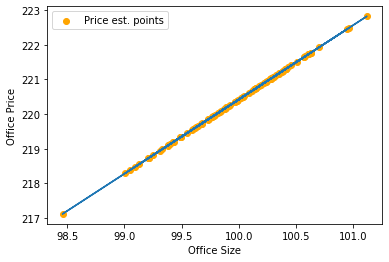

In [42]:
plt.scatter(fake_dataset["Office Size"], fake_dataset["y"],label="Price est. points", color="Orange")
plt.plot(fake_dataset["Office Size"], fake_dataset["y"])
plt.ylabel("Office Price")
plt.xlabel("Office Size")
plt.legend()